In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/serenayang/Desktop/DSC478/project/dataset/train.csv', sep = ',', header = 0)

In [3]:
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
#search all and output any row with nulls
df[df.isnull().any(axis = 1)]

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
87,525234,52428,67405,81.60,78,17014,45,2099,05-08-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
88,637252,51653,63896,86.08,78,17014,45,2079,24-02-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
91,584433,49488,63306,83.72,78,17014,45,2069,27-11-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
99,515149,40884,59313,70.81,78,17014,45,2099,24-02-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
125,547112,49683,62577,83.10,78,17014,45,2099,01-01-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231722,494458,43272,59313,74.86,78,17014,45,2093,03-03-1998,NaN,...,0,0,1125,0,0,0,1yrs 10mon,1yrs 10mon,3,0
231737,419420,36750,62852,60.14,78,17014,45,2082,01-01-1998,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231756,553774,50683,67746,79.71,78,16803,86,2055,16-08-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
231767,594901,55728,74748,79.60,78,16803,86,2073,01-01-1999,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [5]:
#drop all NA in employement_type 
df = df.dropna(subset = ['EMPLOYMENT_TYPE'])

In [6]:
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

#format dataset into correct type
df['DATE_OF_BIRTH'] =  pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')
df['DISBURSAL_DATE'] =  pd.to_datetime(df['DISBURSAL_DATE'], format='%d-%m-%Y')
df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].map(dt.datetime.toordinal)
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].map(dt.datetime.toordinal)

In [7]:
#split AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH into year month
df[['AVERAGE_ACCT_YR', 'AVERAGE_ACCT_M']] = df['AVERAGE_ACCT_AGE'].str.split(' ', expand = True)
df['AVERAGE_ACCT_YR'] = df['AVERAGE_ACCT_YR'].str.extract('(\d+)')
df['AVERAGE_ACCT_M'] = df['AVERAGE_ACCT_M'].str.extract('(\d+)')
#to numeric
df['AVERAGE_ACCT_YR'] = pd.to_numeric(df['AVERAGE_ACCT_YR'])
df['AVERAGE_ACCT_M'] = pd.to_numeric(df['AVERAGE_ACCT_M'])

df[['CREDIT_HISTORY_LENGTH_YR', 'CREDIT_HISTORY_LENGTH_M']] = df['CREDIT_HISTORY_LENGTH'].str.split(' ', expand = True)
df['CREDIT_HISTORY_LENGTH_YR'] = df['CREDIT_HISTORY_LENGTH_YR'].str.extract('(\d+)')
df['CREDIT_HISTORY_LENGTH_M'] = df['CREDIT_HISTORY_LENGTH_M'].str.extract('(\d+)')
#to numeric
df['CREDIT_HISTORY_LENGTH_YR'] = pd.to_numeric(df['CREDIT_HISTORY_LENGTH_YR'])
df['CREDIT_HISTORY_LENGTH_M'] = pd.to_numeric(df['CREDIT_HISTORY_LENGTH_M'])

#drop the old AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH
df = df.drop(columns = ['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             225493 non-null  int64  
 1   DISBURSED_AMOUNT                     225493 non-null  int64  
 2   ASSET_COST                           225493 non-null  int64  
 3   LTV                                  225493 non-null  float64
 4   BRANCH_ID                            225493 non-null  int64  
 5   SUPPLIER_ID                          225493 non-null  int64  
 6   MANUFACTURER_ID                      225493 non-null  int64  
 7   CURRENT_PINCODE_ID                   225493 non-null  int64  
 8   DATE_OF_BIRTH                        225493 non-null  int64  
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       225493 non-null  int64  
 11  STATE_ID     

In [9]:
#turn categorical attributes into dummy variables
df = pd.get_dummies(df, columns = ['EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION'])

#drop unique ID
df = df.drop(columns = ['UNIQUEID'])

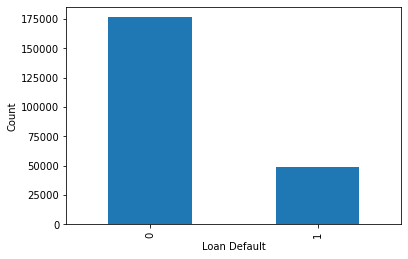

In [10]:
classStats = df.groupby('LOAN_DEFAULT').size()
classStats.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Loan Default')
plt.yticks(np.arange(0, max(classStats), 25000))
plt.show()

----

## KNN

In [11]:
target = df.LOAN_DEFAULT
df = df.drop(columns = ['LOAN_DEFAULT'])
target.shape

(225493,)

In [12]:
target.head()

0    0
1    1
2    0
3    1
4    1
Name: LOAN_DEFAULT, dtype: int64

In [13]:
#seprate into test and train sets
from sklearn.model_selection import train_test_split

train, test, train_label, test_label = train_test_split(df, target, test_size=0.2, random_state=33)
print(train.shape, test.shape)

(180394, 61) (45099, 61)


In [14]:
print(train_label.shape, test_label.shape)

(180394,) (45099,)


In [15]:
train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,DISBURSAL_DATE,STATE_ID,...,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
172064,35287,63641,59.08,18,22927,45,2702,725015,736924,4,...,0,0,0,0,0,0,0,0,0,0
111014,59413,66897,89.99,61,22778,86,1316,724580,736988,6,...,0,0,0,0,0,0,0,0,0,0
106405,66169,90700,73.87,160,24119,51,571,727198,736998,15,...,0,0,1,0,0,0,0,0,0,0
129379,61720,73851,85.00,162,15805,86,1908,720045,736989,4,...,0,0,0,1,0,0,0,0,0,0
195016,61647,73492,85.72,70,18435,86,2412,723667,736937,4,...,0,0,1,0,0,0,0,0,0,0


In [16]:
#Run the accuracy function on a range of values for K in order to compare accuracy values for different 
#numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. 
#For example, when we try evaluating the classifiers on a range of values of K from 1 through 20 and 
#present the results as a table or a graph.

trainA = np.array(train)
testA = np.array(test)
traintblF = np.array(train_label).flatten()
testtblF = np.array(test_label).flatten()

In [18]:
#Naive Bayes
from sklearn import neighbors, tree, naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, train_label)
nbpreds_test = nbclf.predict(test)
print (nbpreds_test)

[0 0 0 ... 0 0 0]


In [19]:
## compute the average accuracy score across the test instances
print (nbclf.score(train, train_label))

0.7730024280186703


In [20]:
#compared to the performance on the training data itself (to check for over- or under-fitting)
print (nbclf.score(test, test_label))

0.7707931439721502


In [26]:
from sklearn.metrics import confusion_matrix
nbccm = confusion_matrix(test_label, nbpreds_test, labels=[0,1])
print(nbccm)

[[34687   579]
 [ 9758    75]]


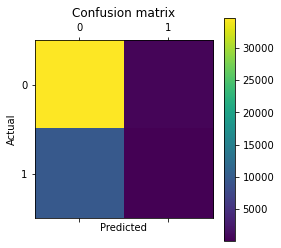

In [27]:
plt.matshow(nbccm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
nbcv_scores = cross_val_score(nbclf, df, target, cv=10)
print(nbcv_scores)

[0.77627494 0.77427938 0.24957871 0.77378154 0.77533372 0.77302763
 0.77755111 0.77404763 0.77280589 0.77165284]


In [31]:
print("Overall Average Accuracy for Naive Bayes (Gaussian): %0.2f (+/- %0.2f)" % (nbcv_scores.mean(), nbcv_scores.std() * 2))

Overall Average Accuracy for Naive Bayes (Gaussian): 0.72 (+/- 0.31)


In [32]:
#scikit-learn's KNN classifier
#Performing min-max normalization to rescale numeric attributes.
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(train)
data_trainN = min_max_scaler.transform(train)
data_testN = min_max_scaler.transform(test)

In [ ]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test = []
train = []
avgResult = []
result = {}
for i in range(1,21):

    knnclf = neighbors.KNeighborsClassifier(i, weights='distance')
    knnclf.fit(data_trainN, train_label)
    #Next, we call the predict function on the test intances to produce the predicted classes.
    knnpreds_test = knnclf.predict(data_testN)
    
    #scikit-learn has various modules that can be used to evaluate classifier accuracy
    print(classification_report(test_label, knnpreds_test))
    
    #confusion matrix
    knncm = confusion_matrix(test_label, knnpreds_test)
    print(knncm)
    
    #get percentahe score from test and train dataset
    # compute the average accuracy score across the test instances
    testScore = knnclf.score(data_testN, test_label)
    #compared to the performance on the training data itself (to check for over- or under-fitting)
    trainScore = knnclf.score(data_trainN, train_label)
    avgScore = (trainScore + testScore)/2
    
    train.append(trainScore.round(3))
    test.append(testScore.round(3))
    avgResult.append(avgScore.round(3)) 
    

In [ ]:
result['train'] = train
result['test'] = test
result['avg'] = avgResult
withWeighting = pd.DataFrame(results, columns=['train', 'test', 'avg'])
withWeighting